<a href="https://colab.research.google.com/github/astrozot/BHimaging/blob/main/BHimaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

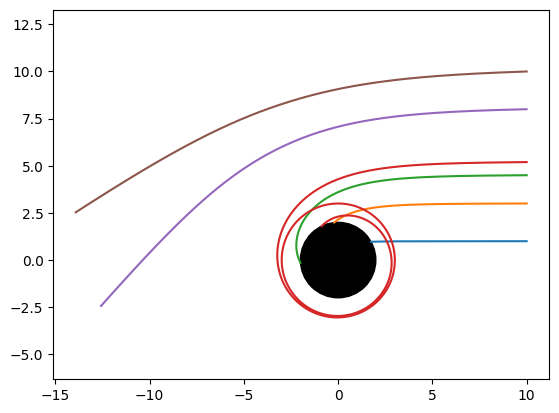

In [2]:
def euler_integrator(M, b, phi0=0.0, u0=0.0, dphi=0.001):
  u = u0
  phi = phi0
  u_max = 1 / (2*M)
  phis = []
  us = []
  while u < u_max:
    phis.append(phi)
    us.append(u)
    k = 2*M*u**3 - u**2 + 1/b**2
    if k < 0:
      return (phis + [2*phis[-1]-phi for phi in phis[::-1]],
              us + us[::-1])
    phi += dphi
    u += dphi * np.sqrt(k)
  return phis, us

M = 1.0
bs = [1.0, 3.0, 4.5, 3*np.sqrt(3)-1e-5, 8, 10]
x0 = 10
for b in bs:
  r0 = np.sqrt(b**2 + x0**2)
  phis, us = euler_integrator(M, b, np.arcsin(b/r0), 1/r0)
  xs = np.cos(phis) / us
  ys = np.sin(phis) / us
  plt.plot(xs, ys)
circle = plt.Circle((0., 0.), 2*M, color='black', fill=True)
plt.gca().add_patch(circle)
plt.axis("equal")
plt.show()

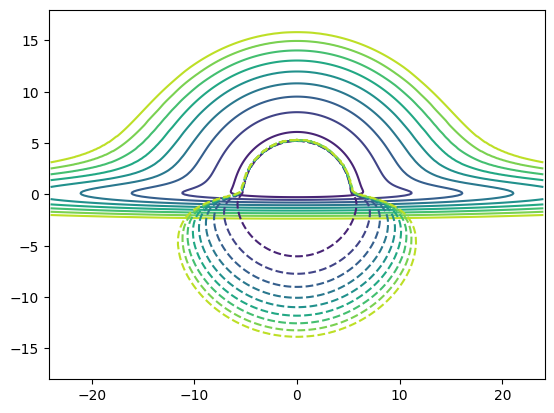

In [3]:
# Disk inclination
theta0 = np.deg2rad(87.0)
# Polar coordinates on the "focal" plane at the observer
bs = np.linspace(1e-5, 40, 401)

# Integrate various orbits for different values of b
rss = []
phiss = []
for b in bs:
    phis, us = euler_integrator(M, b, 0.0, 1e-5)
    rss.append(1 / np.array(us))
    phiss.append(np.array(phis))

# Output grid
xs, ys = np.mgrid[-18.0:18.0:361j, -24.0:24.0:481j]
r1s = np.zeros_like(xs)
r2s = np.zeros_like(xs)
js = np.arange(len(bs))
for ix, x in enumerate(xs[:,0]):
  for iy, y in enumerate(ys[0,:]):
    # I first convert (x,y) in polar coordinates (b, alpha)
    b = np.sqrt(x*x + y*y)
    alpha = np.arctan2(y, x)
    # 1st and 2nd order image: find gamma
    gamma1 = np.arccos(
        np.cos(alpha) / np.sqrt(np.cos(alpha)**2 +
                                1.0 / (np.tan(theta0)**2)))
    gamma2 = gamma1 + np.pi
    # Here is a trick: I find, among the pre-computed orbits,
    # the one that has an inpact parameter just below b. This
    # is done to prepare an interpolation of the orbits.
    # Below j indicates the interpolated index.
    j = np.interp(b, bs, js)
    # fractional part of j, used in the linear interpolation
    f = j - int(j)
    # Below r_a and r_b are the two interpolated values of r
    if int(j) == 0:
      r_a = 0.0
    else:
      r_a = np.interp(gamma1, phiss[int(j)], rss[int(j)])
    r_b = np.interp(gamma1, phiss[int(j) + 1], rss[int(j) + 1])
    # I finally itterpolate the r_a and r_b using f.
    r1s[ix, iy] = np.minimum(r_a * (1 - f) + r_b * f, 50)
    # Same for the 2nd order image
    if int(j) == 0:
      r_a = 0.0
    else:
      r_a = np.interp(gamma2, phiss[int(j)], rss[int(j)])
    r_b = np.interp(gamma2, phiss[int(j) + 1], rss[int(j) + 1])
    r2s[ix, iy] = np.minimum(r_a * (1 - f) + r_b * f, 50)

plt.contour(ys, -xs, r1s, levels=10);
plt.contour(ys, -xs, r2s, levels=10, linestyles="dashed");
plt.axis("equal")
plt.show()

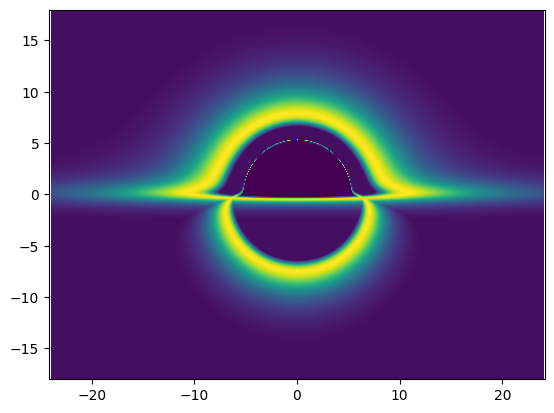

In [4]:
rM = np.maximum(r1s / M, 6)
F1 = (np.sqrt(rM) - np.sqrt(6) + np.log(((np.sqrt(rM) + np.sqrt(3)) * (np.sqrt(6) - np.sqrt(3))) /
                                        ((np.sqrt(rM) - np.sqrt(3)) * (np.sqrt(6) + np.sqrt(3))))
      * np.sqrt(3) / 2) / ((rM - 3) * rM**2.5)
rM = np.maximum(r2s / M, 6)
F2 = (np.sqrt(rM) - np.sqrt(6) + np.log(((np.sqrt(rM) + np.sqrt(3)) * (np.sqrt(6) - np.sqrt(3))) /
                                        ((np.sqrt(rM) - np.sqrt(3)) * (np.sqrt(6) + np.sqrt(3))))
      * np.sqrt(3) / 2) / ((rM - 3) * rM**2.5)
plt.imshow(np.maximum(F1, F2), extent=[-24, 24, -18, 18]);
plt.axis("equal")
plt.show()

<ipython-input-5-d7f52c4a2760>:3: RuntimeWarning: divide by zero encountered in divide
  z1 = (1 + np.sqrt(M / r1s**3) * bs * np.sin(theta0) * np.sin(alphas)) / np.sqrt(1 - 3*M / r1s)
<ipython-input-5-d7f52c4a2760>:3: RuntimeWarning: invalid value encountered in multiply
  z1 = (1 + np.sqrt(M / r1s**3) * bs * np.sin(theta0) * np.sin(alphas)) / np.sqrt(1 - 3*M / r1s)
<ipython-input-5-d7f52c4a2760>:3: RuntimeWarning: invalid value encountered in sqrt
  z1 = (1 + np.sqrt(M / r1s**3) * bs * np.sin(theta0) * np.sin(alphas)) / np.sqrt(1 - 3*M / r1s)
<ipython-input-5-d7f52c4a2760>:4: RuntimeWarning: divide by zero encountered in divide
  z2 = (1 + np.sqrt(M / r2s**3) * bs * np.sin(theta0) * np.sin(alphas)) / np.sqrt(1 - 3*M / r2s)
<ipython-input-5-d7f52c4a2760>:4: RuntimeWarning: invalid value encountered in multiply
  z2 = (1 + np.sqrt(M / r2s**3) * bs * np.sin(theta0) * np.sin(alphas)) / np.sqrt(1 - 3*M / r2s)
<ipython-input-5-d7f52c4a2760>:4: RuntimeWarning: invalid value encountered in sq

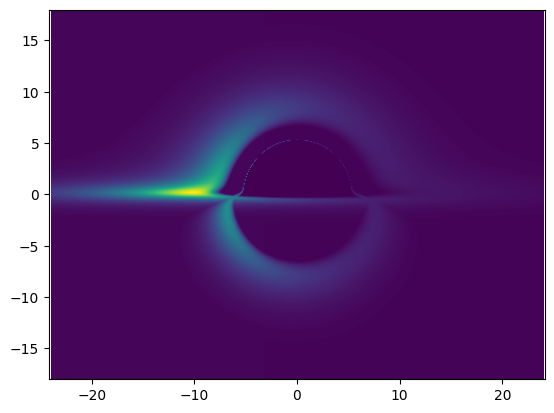

In [5]:
bs = np.sqrt(xs*xs + ys*ys)
alphas = np.arctan2(ys, xs)
z1 = (1 + np.sqrt(M / r1s**3) * bs * np.sin(theta0) * np.sin(alphas)) / np.sqrt(1 - 3*M / r1s)
z2 = (1 + np.sqrt(M / r2s**3) * bs * np.sin(theta0) * np.sin(alphas)) / np.sqrt(1 - 3*M / r2s)
z1[np.isnan(z1)] = 1
z2[np.isnan(z2)] = 1
plt.imshow(np.maximum(F1 / z1**4, F2 / z2**4), extent=[-24, 24, -18, 18]);
plt.axis("equal")
plt.show()